In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import statsmodels as sm
from matplotlib import pyplot as plt
from sklearn import metrics
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error
from   datetime                        import  datetime
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(mat.__version__)

1.18.4
1.0.3
0.10.1
3.2.1


In [380]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [381]:
import os
os.chdir('E:/AIMLGLIM/TIME_SERIES_FORECASTING/project')
os.getcwd()

'E:\\AIMLGLIM\\TIME_SERIES_FORECASTING\\project'

In [382]:
df1 = pd.read_csv('Sparkling.csv')
df1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [383]:
len(df1)

187

In [384]:
date = pd.date_range(start='01/01/1980',freq='M',periods=187)


In [385]:
df1['Time_Stamp'] = pd.to_datetime(date,yearfirst=False,dayfirst=False,format="%")
df1.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [386]:
df1.set_index(keys='Time_Stamp',drop=True,inplace=True)
df1.tail()

,YearMonth,Sparkling
Time_Stamp,,
1995-03-31,1995-03,1897
1995-04-30,1995-04,1862
1995-05-31,1995-05,1670
1995-06-30,1995-06,1688
1995-07-31,1995-07,2031


In [387]:
df1.drop(labels='YearMonth',axis=1,inplace=True)
df1.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [388]:
df1.index

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', name='Time_Stamp', length=187, freq=None)

In [389]:
df1.Sparkling

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
              ... 
1995-03-31    1897
1995-04-30    1862
1995-05-31    1670
1995-06-30    1688
1995-07-31    2031
Name: Sparkling, Length: 187, dtype: int64

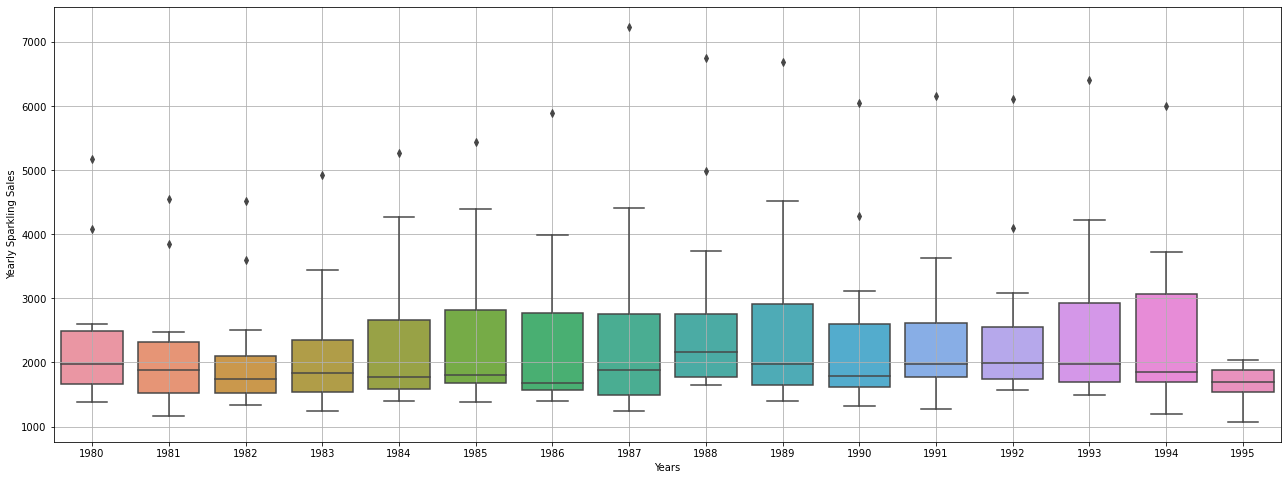

In [390]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, df1.Sparkling, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Sparkling Sales');

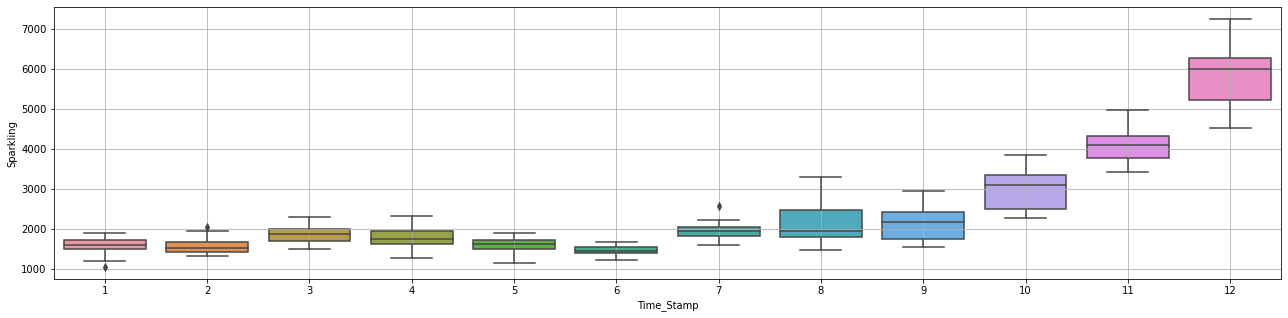

In [391]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df1.index.month, df1.Sparkling, ax=ax,whis=1.5)
plt.grid();

In [392]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

,Sparkling
Time_Stamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


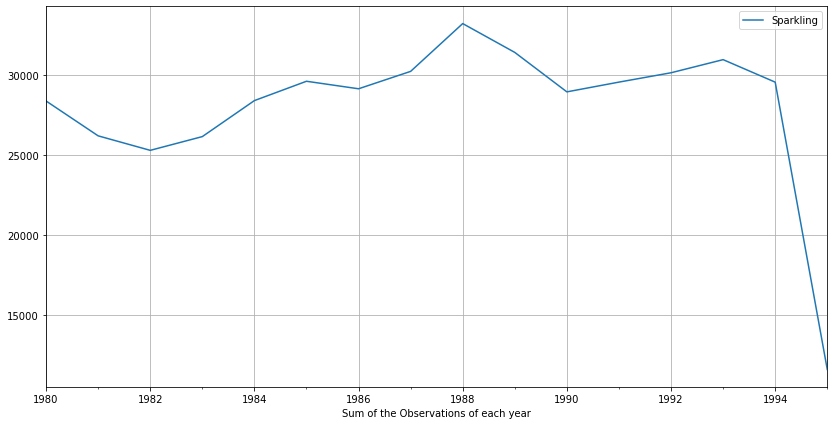

In [393]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [394]:
df1_yearly_mean = df1.resample('Y').mean()
df1_yearly_mean.head()

,Sparkling
Time_Stamp,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


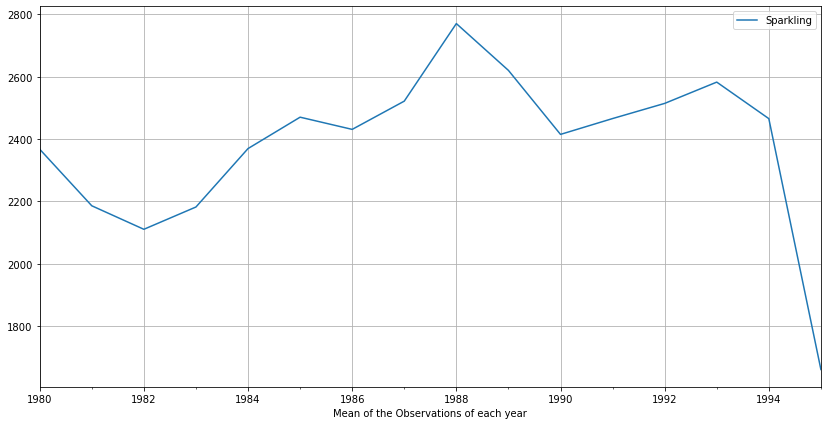

In [395]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

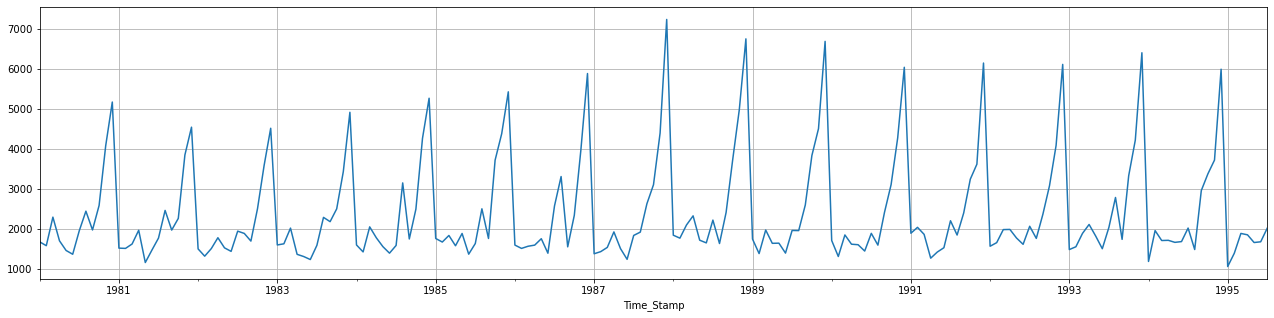

In [396]:
fig, ax = plt.subplots(figsize=(22,5))
df1.Sparkling.plot()
plt.grid();

In [397]:
df1.isna()

,Sparkling
Time_Stamp,
1980-01-31,False
1980-02-29,False
1980-03-31,False
1980-04-30,False
1980-05-31,False
...,...
1995-03-31,False
1995-04-30,False
1995-05-31,False


In [398]:
df1[df1.isna().any(axis=1)]

,Sparkling
Time_Stamp,


In [399]:
df1['1994']

,Sparkling
Time_Stamp,
1994-01-31,1197
1994-02-28,1968
1994-03-31,1720
1994-04-30,1725
1994-05-31,1674
1994-06-30,1693
1994-07-31,2031
1994-08-31,1495
1994-09-30,2968


In [400]:
#df1['1994']=df1.interpolate(method='spline',order=3)['1994']

In [401]:
df1['1994']

,Sparkling
Time_Stamp,
1994-01-31,1197
1994-02-28,1968
1994-03-31,1720
1994-04-30,1725
1994-05-31,1674
1994-06-30,1693
1994-07-31,2031
1994-08-31,1495
1994-09-30,2968


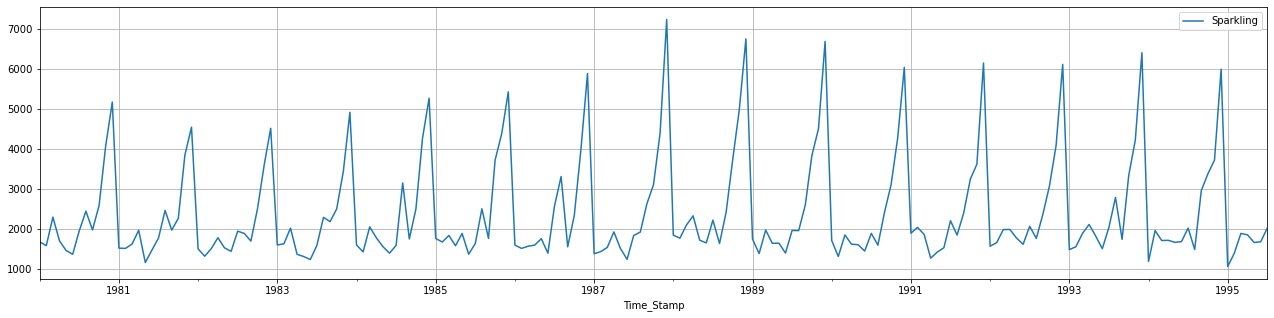

In [402]:
df1.plot(figsize=(22,5))
plt.grid();

In [403]:
from statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

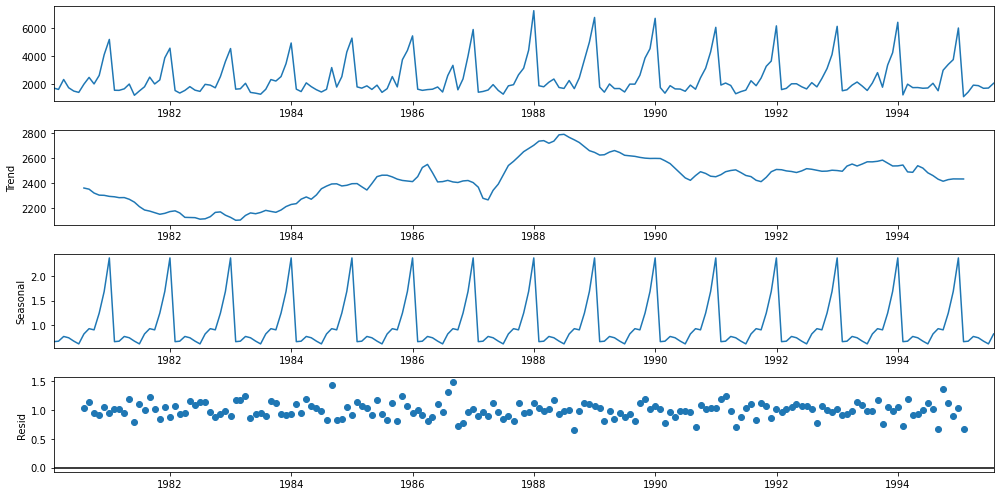

In [404]:
decomposition = seasonal_decompose(df1,model='multiplicative')
decomposition.plot();

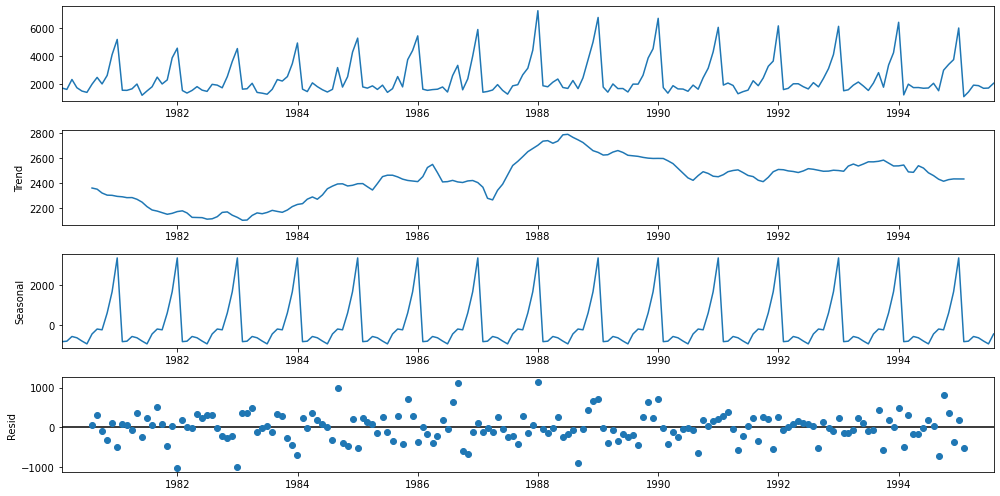

In [405]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

In [406]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [407]:
test.index.year

Int64Index([1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
            1991, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            1992, 1992, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993, 1993,
            1993, 1993, 1993, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994,
            1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995, 1995, 1995, 1995],
           dtype='int64', name='Time_Stamp')

In [408]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



In [409]:
train

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116


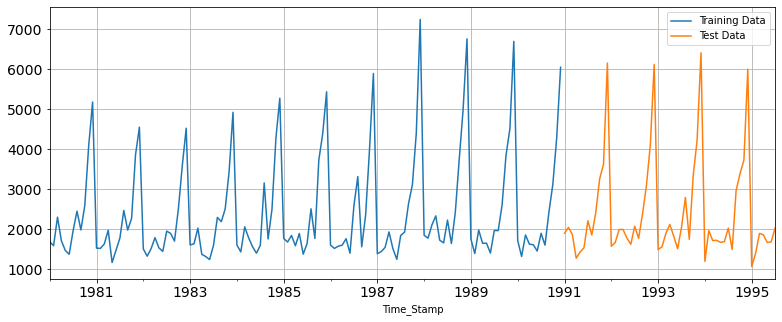

In [410]:

train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [411]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [412]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [413]:
len(test_time)

55

# NAIVE-MODEL

In [414]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [415]:
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [416]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

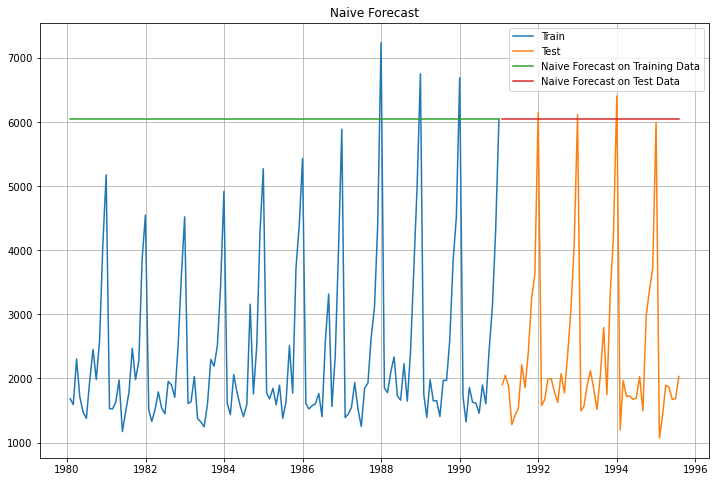

In [417]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [418]:
rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 MAPE is 153.17


In [419]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 MAPE is 152.87


In [420]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

#resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf = resultsDf_2
resultsDf


,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87


# SIMPLE-AVERAGE

In [421]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [422]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

,Sparkling,mean_forecast
Time_Stamp,,
1980-01-31,1686,2403.780303
1980-02-29,1591,2403.780303
1980-03-31,2304,2403.780303
1980-04-30,1712,2403.780303
1980-05-31,1471,2403.780303


In [423]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


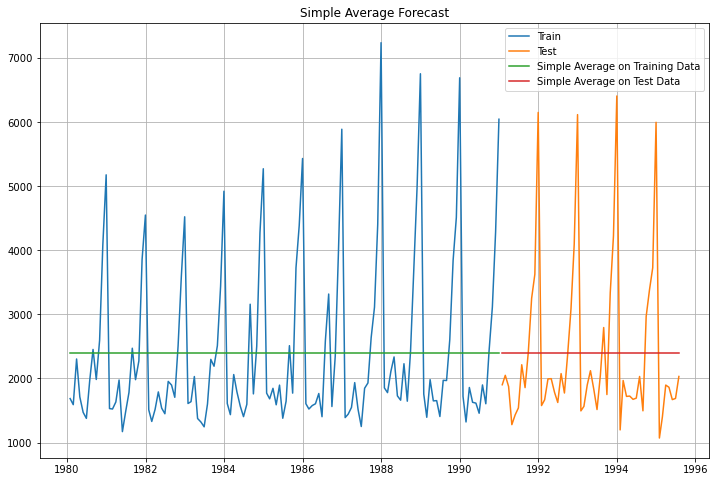

In [424]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [425]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 MAPE is 40.36


In [426]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [427]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90


# LINEAR REGRESSION

In [428]:

LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [429]:

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [430]:

from sklearn.linear_model import LinearRegression

In [431]:

lr = LinearRegression()

In [432]:

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [433]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

#### Evaluate this model on the test data using Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE)

In [434]:

from sklearn import metrics

In [435]:

## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [436]:

## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 MAPE is 50.15


In [437]:

resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15


### Model 2: Build a Simple Exponential Smoothing model by taking alpha =1. Then,evaluate the same model on the test set using RMSE and MAPE.

In [438]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [439]:
SES_train = train.copy()
SES_test = test.copy()

In [440]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [441]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [442]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.785621547663,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [443]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-31    2403.785622
1991-02-28    2403.785622
1991-03-31    2403.785622
1991-04-30    2403.785622
1991-05-31    2403.785622
1991-06-30    2403.785622
1991-07-31    2403.785622
1991-08-31    2403.785622
1991-09-30    2403.785622
1991-10-31    2403.785622
1991-11-30    2403.785622
1991-12-31    2403.785622
1992-01-31    2403.785622
1992-02-29    2403.785622
1992-03-31    2403.785622
1992-04-30    2403.785622
1992-05-31    2403.785622
1992-06-30    2403.785622
1992-07-31    2403.785622
1992-08-31    2403.785622
1992-09-30    2403.785622
1992-10-31    2403.785622
1992-11-30    2403.785622
1992-12-31    2403.785622
1993-01-31    2403.785622
1993-02-28    2403.785622
1993-03-31    2403.785622
1993-04-30    2403.785622
1993-05-31    2403.785622
1993-06-30    2403.785622
1993-07-31    2403.785622
1993-08-31    2403.785622
1993-09-30    2403.785622
1993-10-31    2403.785622
1993-11-30    2403.785622
1993-12-31    2403.785622
1994-01-31    2403.785622
1994-02-28    2403.785622
1994-03-31  

In [444]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
mape_model2_test = MAPE(test['Sparkling'],test_predictions_model2)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.082 MAPE is 38.90


In [445]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]}
                              ,index=['Alpha=1:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90


# Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [446]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Test RMSE,Test MAPE


In [447]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    mape_model2_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i
                                              ,'Test MAPE':mape_model2_test_i}, ignore_index=True)

In [448]:
resultsDf_model

,Alpha Values,Test RMSE,Test MAPE
0,0.01,1281.032699,36.63
1,0.02,1279.495201,40.97
2,0.03,1293.110073,43.20
3,0.04,1305.462953,44.53
4,0.05,1316.411742,45.50
...,...,...,...
94,0.95,3778.432623,149.55
95,0.96,3796.048620,150.22
96,0.97,3813.437370,150.88
97,0.98,3830.602869,151.54


In [449]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE,Test MAPE
1,0.02,1279.495201,40.97
0,0.01,1281.032699,36.63
2,0.03,1293.110073,43.20
3,0.04,1305.462953,44.53
4,0.05,1316.411742,45.50
...,...,...,...
94,0.95,3778.432623,149.55
95,0.96,3796.048620,150.22
96,0.97,3813.437370,150.88
97,0.98,3830.602869,151.54


In [450]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.iloc[1:2,0:3].values[0][1]]
                               ,'Test MAPE': [resultsDf_model.iloc[1:2,0:3].values[0][2]]}
                              ,index=['Alpha=0.02,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97


#### Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE and MAPE.¶

In [451]:

DES_train = train.copy()
DES_test = test.copy()

In [452]:
model_DES = Holt(SES_train['Sparkling'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [453]:

model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [454]:

model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.647792,True
smoothing_slope,beta,0.000000,True
initial_level,l.0,1686.083777,True
initial_slope,b.0,27.059653,True


In [455]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-31    5281.439591
1991-02-28    5308.499244
1991-03-31    5335.558897
1991-04-30    5362.618550
1991-05-31    5389.678203
1991-06-30    5416.737856
1991-07-31    5443.797509
1991-08-31    5470.857163
1991-09-30    5497.916816
1991-10-31    5524.976469
1991-11-30    5552.036122
1991-12-31    5579.095775
1992-01-31    5606.155428
1992-02-29    5633.215081
1992-03-31    5660.274734
1992-04-30    5687.334387
1992-05-31    5714.394040
1992-06-30    5741.453693
1992-07-31    5768.513346
1992-08-31    5795.572999
1992-09-30    5822.632652
1992-10-31    5849.692306
1992-11-30    5876.751959
1992-12-31    5903.811612
1993-01-31    5930.871265
1993-02-28    5957.930918
1993-03-31    5984.990571
1993-04-30    6012.050224
1993-05-31    6039.109877
1993-06-30    6066.169530
1993-07-31    6093.229183
1993-08-31    6120.288836
1993-09-30    6147.348489
1993-10-31    6174.408142
1993-11-30    6201.467796
1993-12-31    6228.527449
1994-01-31    6255.587102
1994-02-28    6282.646755
1994-03-31  

In [456]:

## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
mape_model3_test = MAPE(test['Sparkling'],test_predictions_model3)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3850.990 MAPE is 152.06


In [457]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                              ,index=['Alpha=0.65,Beta=0:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97
"Alpha=0.65,Beta=0:DoubleExponentialSmoothing",3850.989796,152.06


### Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE and MAPE

In [458]:
TES_train = train.copy()
TES_test = test.copy()

In [459]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [460]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [461]:

model_TES_autofit.params

{'smoothing_level': 0.15420626100710186,
 'smoothing_slope': 5.31004588730174e-21,
 'smoothing_seasonal': 0.3713228125445634,
 'damping_slope': nan,
 'initial_level': 1639.99933972618,
 'initial_slope': 4.847695527861546,
 'initial_seasons': array([1.00842978, 0.96899514, 1.24181168, 1.13206716, 0.93979295,
        0.93811177, 1.22457951, 1.54428109, 1.27335495, 1.631977  ,
        2.48292059, 3.11861503]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [462]:

test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-31    1602.194523
1991-02-28    1373.889119
1991-03-31    1807.439476
1991-04-30    1704.573982
1991-05-31    1602.374672
1991-06-30    1415.479577
1991-07-31    1944.852634
1991-08-31    1910.059979
1991-09-30    2435.190322
1991-10-31    3333.449555
1991-11-30    4407.775852
1991-12-31    6328.534082
1992-01-31    1656.058224
1992-02-29    1419.948452
1992-03-31    1867.864677
1992-04-30    1761.401928
1992-05-31    1655.647443
1992-06-30    1462.408790
1992-07-31    2009.155172
1992-08-31    1973.038649
1992-09-30    2515.263621
1992-10-31    3442.759657
1992-11-30    4551.921241
1992-12-31    6534.930637
1993-01-31    1709.921926
1993-02-28    1466.007784
1993-03-31    1928.289878
1993-04-30    1818.229874
1993-05-31    1708.920214
1993-06-30    1509.338003
1993-07-31    2073.457711
1993-08-31    2036.017319
1993-09-30    2595.336921
1993-10-31    3552.069759
1993-11-30    4696.066631
1993-12-31    6741.327192
1994-01-31    1763.785628
1994-02-28    1512.067116
1994-03-31  

In [463]:
## Test Data - RMSE and MAPE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
mape_model4_test = MAPE(test['Sparkling'],test_predictions_model4)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test, mape_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 383.158 MAPE is 11.91


In [464]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test],'Test MAPE': [mape_model4_test]}
                              ,index=['Alpha=0.15,Beta=5.31,Gamma=0.37: TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97
"Alpha=0.65,Beta=0:DoubleExponentialSmoothing",3850.989796,152.06
"Alpha=0.15,Beta=5.31,Gamma=0.37: TripleExponentialSmoothing",383.157627,11.91


### Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [465]:

DES_train = train.copy()
DES_test = test.copy()

In [466]:
model_DES = Holt(DES_train['Sparkling'])

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [467]:
resultsDf_model.iloc[1:2,0:3].values[0][2]

40.97

In [468]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE,Test MAPE


In [469]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        mape_model4_test = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test
                                          ,'Test MAPE':mape_model4_test}, ignore_index=True)

In [470]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE,Test MAPE
0,0.01,0.01,6336.376572,257.11
1,0.01,0.02,3631.150072,141.70
2,0.01,0.03,1839.356840,55.06
3,0.01,0.04,1471.745468,47.40
4,0.01,0.05,2105.190091,76.57
...,...,...,...,...
9796,0.99,0.95,58827.192994,2169.12
9797,0.99,0.96,59032.966109,2176.59
9798,0.99,0.97,59235.912466,2183.96
9799,0.99,0.98,59436.052592,2191.22


In [471]:

resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE,Test MAPE
148,0.02,0.50,1274.630824,38.90
115,0.02,0.17,1275.105310,39.45
254,0.03,0.57,1276.025836,39.17
255,0.03,0.58,1278.425944,37.80
253,0.03,0.56,1278.585750,40.76
...,...,...,...,...
2175,0.22,0.97,60335.137153,2209.33
2077,0.21,0.98,60589.909084,2216.10
2176,0.22,0.98,60740.944412,2224.57
2177,0.22,0.99,61104.414936,2238.27


In [472]:

temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.iloc[0:1,].values[0][2]]
                               ,'Test MAPE': [resultsDf_model.iloc[0:1,].values[0][3]]}
                              ,index=['Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97
"Alpha=0.65,Beta=0:DoubleExponentialSmoothing",3850.989796,152.06
"Alpha=0.15,Beta=5.31,Gamma=0.37: TripleExponentialSmoothing",383.157627,11.91
"Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing",6336.376572,257.11


### Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [473]:

TES_train = train.copy()
TES_test = test.copy()

In [474]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE


In [475]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model6_test_2 = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2
                                                  ,'Test MAPE':mape_model6_test_2}, ignore_index=True)

In [476]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE
0,0.1,0.1,0.1,5.799963e+02,19.22
1,0.1,0.1,0.2,6.174690e+02,20.80
2,0.1,0.1,0.3,6.387802e+02,21.67
3,0.1,0.1,0.4,6.447620e+02,22.22
4,0.1,0.1,0.5,6.411226e+02,22.29
...,...,...,...,...,...
995,1.0,1.0,0.6,7.989790e+05,17177.41
996,1.0,1.0,0.7,1.074413e+06,28878.00
997,1.0,1.0,0.8,5.010607e+06,65738.32
998,1.0,1.0,0.9,4.318265e+05,6048.85


In [477]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE,Test MAPE
301,0.4,0.1,0.2,3.367153e+02,10.56
211,0.3,0.2,0.2,3.501452e+02,11.08
110,0.2,0.2,0.1,3.525717e+02,11.28
200,0.3,0.1,0.1,3.526078e+02,11.11
20,0.1,0.3,0.1,3.545346e+02,11.77
...,...,...,...,...,...
875,0.9,0.8,0.6,1.525672e+07,162808.72
987,1.0,0.9,0.8,2.310533e+07,450805.47
885,0.9,0.9,0.6,2.666257e+07,304386.67
857,0.9,0.6,0.8,2.880757e+07,343787.92


In [478]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [3.367153e+02]
                               ,'Test MAPE': [110.56]}
                              ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2:Triple ExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97
"Alpha=0.65,Beta=0:DoubleExponentialSmoothing",3850.989796,152.06
"Alpha=0.15,Beta=5.31,Gamma=0.37: TripleExponentialSmoothing",383.157627,11.91
"Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing",6336.376572,257.11
"Alpha=0.4,Beta=0.1,Gamma=0.2:Triple ExponentialSmoothing",336.715300,110.56


In [562]:
dir(model_TES_alpha_i_j_k)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_attr',
 'aic',
 'aicc',
 'bic',
 'data',
 'fcastvalues',
 'fittedfcast',
 'fittedvalues',
 'forecast',
 'initialize',
 'k',
 'k_constant',
 'level',
 'mle_retvals',
 'model',
 'optimized',
 'params',
 'params_formatted',
 'predict',
 'resid',
 'season',
 'slope',
 'sse',
 'summary']

In [568]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = model_TES_alpha_i_j_k.forecast(12)

In [569]:
prediction_1 

1991-01-31     -2008.043976
1991-02-28      2047.979514
1991-03-31     -2897.518715
1991-04-30      2414.075449
1991-05-31     -2605.717202
1991-06-30      3703.698418
1991-07-31    -10530.769536
1991-08-31     41491.508115
1991-09-30     72844.065052
1991-10-31    -46907.191701
1991-11-30     67210.591302
1991-12-31    110926.537513
Freq: M, dtype: float64

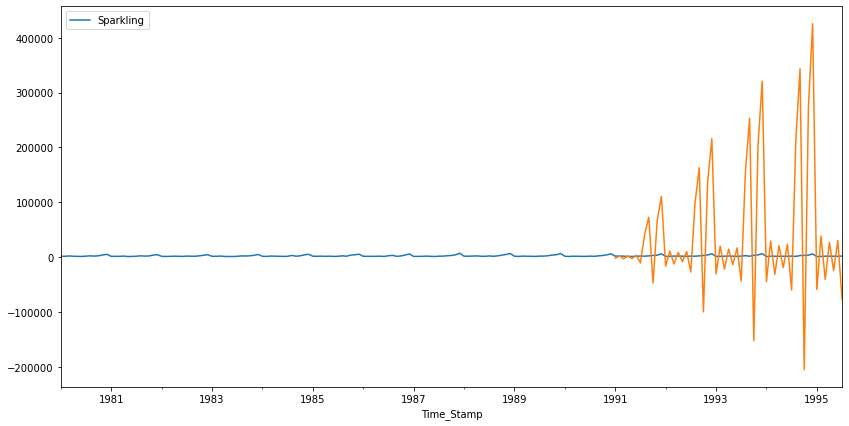

In [567]:
df1.plot()
prediction_1.plot();

In [550]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1991-01-31,131765.296684,-2008.043976,333454.718533
1991-02-28,135821.320174,2047.979514,337510.742023
1991-03-31,130875.821946,-2897.518715,332565.243795
1991-04-30,136187.416109,2414.075449,337876.837958
1991-05-31,131167.623458,-2605.717202,332857.045307


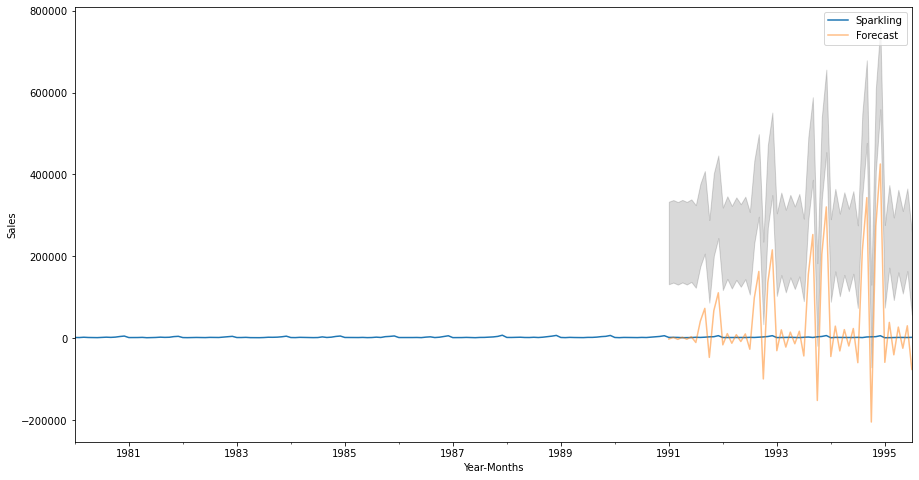

In [552]:
axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

# MOVING AVERAGES

In [479]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [480]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


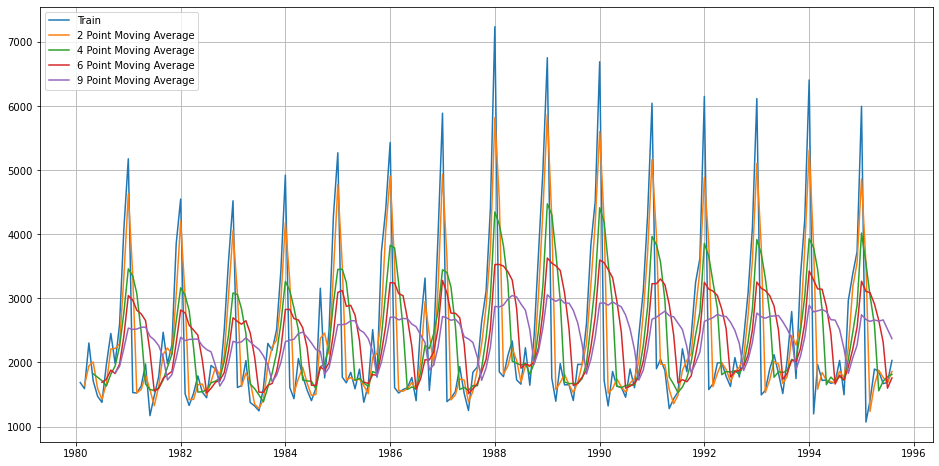

In [481]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [482]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)-2] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7)+2:]

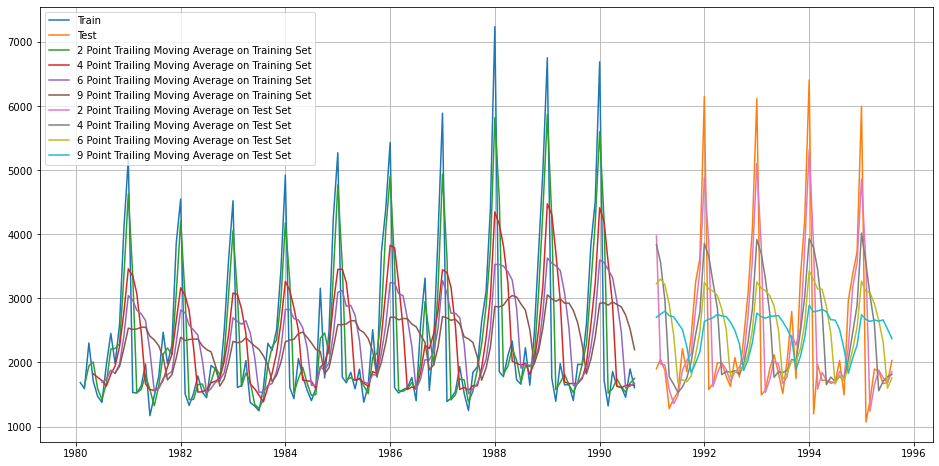

In [483]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [484]:
trailing_MovingAverage_test['Trailing_2'].size

55

In [485]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))



For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401 MAPE is 19.70


In [486]:
## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590 MAPE is 35.96
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927 MAPE is 43.86
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 MAPE is 46.86


In [487]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
NaiveModel,3864.279352,152.87
SimpleAverageModel,1275.081804,38.90
RegressionOnTime,1389.135175,50.15
Alpha=1:SimpleExponentialSmoothing,1275.081823,38.90
"Alpha=0.02,SimpleExponentialSmoothing",1279.495201,40.97
"Alpha=0.65,Beta=0:DoubleExponentialSmoothing",3850.989796,152.06
"Alpha=0.15,Beta=5.31,Gamma=0.37: TripleExponentialSmoothing",383.157627,11.91
"Alpha=0.02,Beta=0.50,DoubleExponentialSmoothing",6336.376572,257.11
"Alpha=0.4,Beta=0.1,Gamma=0.2:Triple ExponentialSmoothing",336.715300,110.56
2pointTrailingMovingAverage,813.400684,19.70


In [488]:

## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

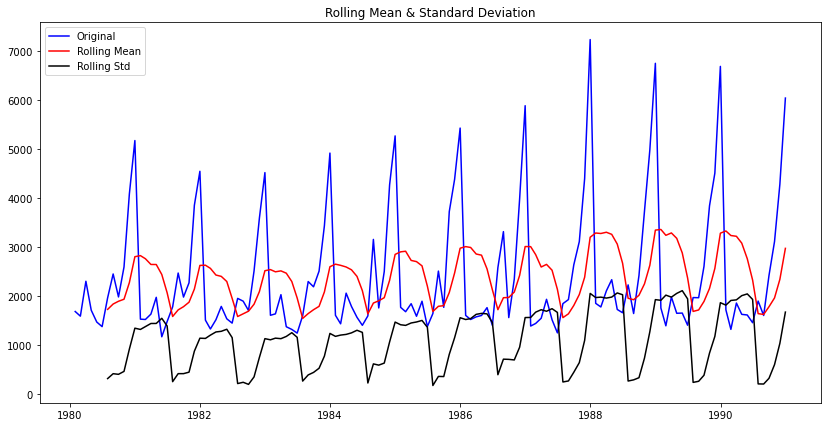

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [489]:
test_stationarity(train['Sparkling'])

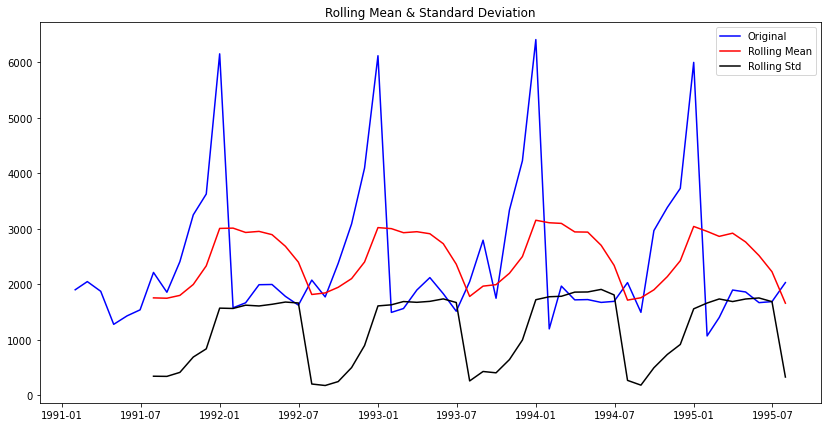

Results of Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [490]:
test_stationarity(test['Sparkling'])

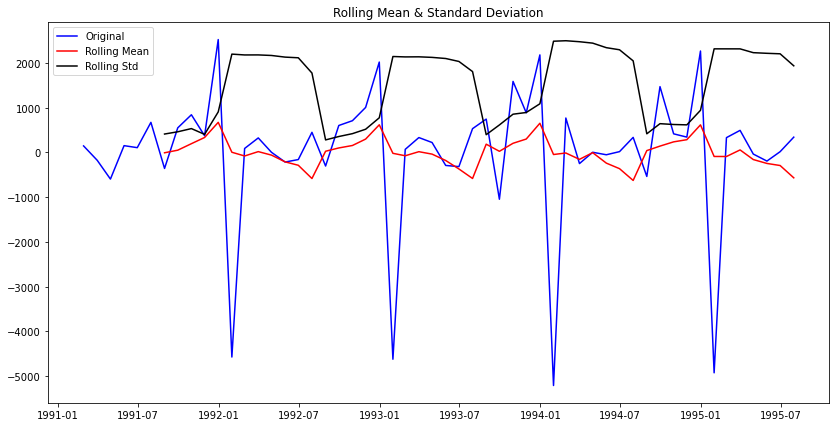

Results of Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [491]:
test_stationarity(test.diff(1).dropna())

In [492]:
test_diff = test.diff(periods=1).dropna()
test_diff

,Sparkling
Time_Stamp,
1991-02-28,147.0
1991-03-31,-175.0
1991-04-30,-595.0
1991-05-31,153.0
1991-06-30,108.0
1991-07-31,674.0
1991-08-31,-357.0
1991-09-30,551.0
1991-10-31,844.0


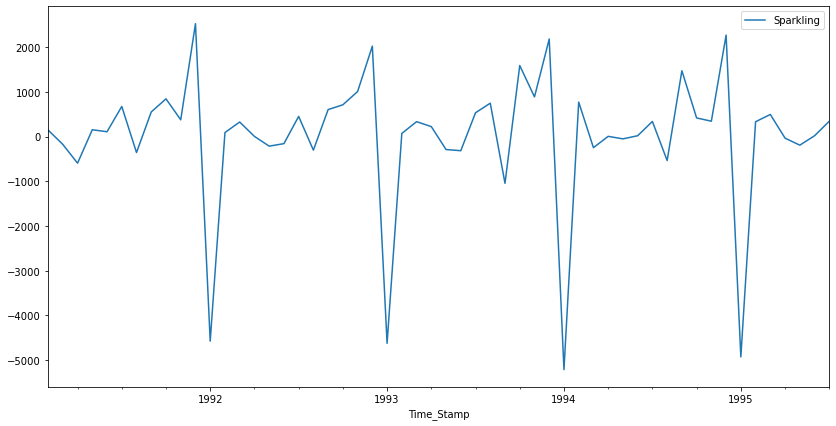

In [493]:
test_diff.plot();

In [494]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


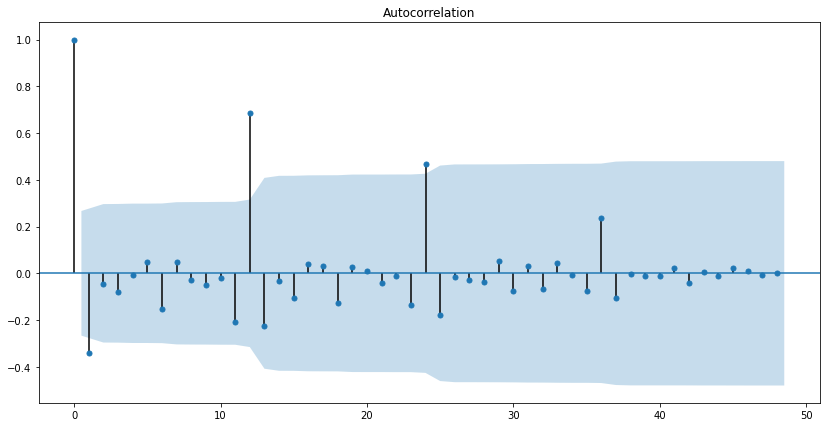

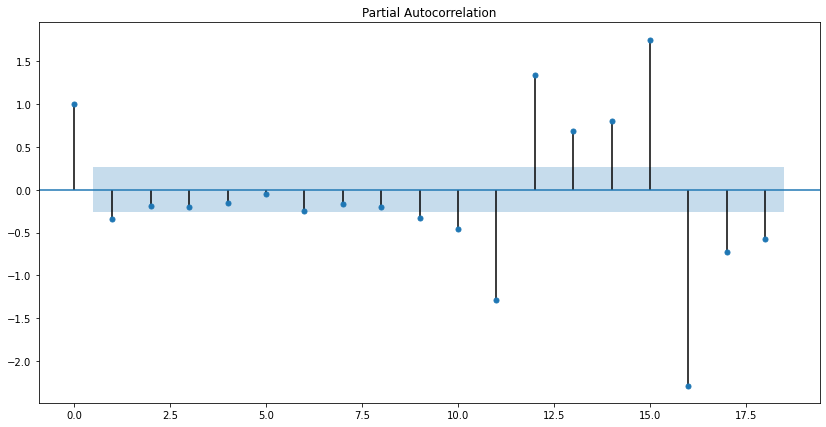

In [495]:
plot_acf(test_diff,lags=48)
plot_pacf(test_diff);

#### Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [496]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [497]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [498]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)



ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591681
ARIMA(0, 1, 2) - AIC:2234.4083231284767
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.7550946774113


C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004519866
ARIMA(2, 1, 0) - AIC:2260.365743968102
ARIMA(2, 1, 1) - AIC:2233.777626292722
ARIMA(2, 1, 2) - AIC:2213.5092123928453


In [499]:

## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [500]:
mod = ARIMA(train['Sparkling'], order=(2,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 23 Aug 2020   AIC                           2213.509
Time:                        23:03:38   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

In [501]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [502]:
results_Arima

In [503]:
from sklearn.metrics import mean_squared_error

In [504]:

predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    4252.346471
1991-02-28    2863.094190
1991-03-31    2043.981113
1991-04-30    1746.214744
1991-05-31    1813.637173
1991-06-30    2068.641485
1991-07-31    2365.526078
1991-08-31    2612.448890
1991-09-30    2770.393033
1991-10-31    2839.530730
1991-11-30    2841.909845
1991-12-31    2806.363256
1992-01-31    2758.391627
1992-02-29    2715.328578
1992-03-31    2685.655365
1992-04-30    2670.805741
1992-05-31    2667.917442
1992-06-30    2672.432972
1992-07-31    2679.973247
1992-08-31    2687.341406
1992-09-30    2692.792009
1992-10-31    2695.822835
1992-11-30    2696.751124
1992-12-31    2696.274019
1993-01-31    2695.128821
1993-02-28    2693.893036
1993-03-31    2692.912054
1993-04-30    2692.316064
1993-05-31    2692.082717
1993-06-30    2692.109873
1993-07-31    2692.276015
1993-08-31    2692.478822
1993-09-30    2692.652006
1993-10-31    2692.765813
1993-11-30    2692.818280
1993-12-31    2692.823470
1994-01-31    2692.800937
1994-02-28    2692.768467
1994-03-31  

In [505]:
predicted_autoARIMA.tail()

1995-03-31    2692.721440
1995-04-30    2692.720749
1995-05-31    2692.720317
1995-06-30    2692.720136
1995-07-31    2692.720141
Freq: M, dtype: float64

In [506]:
results_Arima.predict(start=pd.to_datetime('1991-01-31'),end=pd.to_datetime('1995-07-31'),typ = 'level',dynamic=True,full_results=True)

1991-01-31    4252.346471
1991-02-28    2863.094190
1991-03-31    2043.981113
1991-04-30    1746.214744
1991-05-31    1813.637173
1991-06-30    2068.641485
1991-07-31    2365.526078
1991-08-31    2612.448890
1991-09-30    2770.393033
1991-10-31    2839.530730
1991-11-30    2841.909845
1991-12-31    2806.363256
1992-01-31    2758.391627
1992-02-29    2715.328578
1992-03-31    2685.655365
1992-04-30    2670.805741
1992-05-31    2667.917442
1992-06-30    2672.432972
1992-07-31    2679.973247
1992-08-31    2687.341406
1992-09-30    2692.792009
1992-10-31    2695.822835
1992-11-30    2696.751124
1992-12-31    2696.274019
1993-01-31    2695.128821
1993-02-28    2693.893036
1993-03-31    2692.912054
1993-04-30    2692.316064
1993-05-31    2692.082717
1993-06-30    2692.109873
1993-07-31    2692.276015
1993-08-31    2692.478822
1993-09-30    2692.652006
1993-10-31    2692.765813
1993-11-30    2692.818280
1993-12-31    2692.823470
1994-01-31    2692.800937
1994-02-28    2692.768467
1994-03-31  

In [507]:
RMSE_autoARIMA = mean_squared_error(test['Sparkling'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Sparkling'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 1299.9802037470515 
MAPE for the autofit ARIMA model: 43.2


In [508]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.980204,43.2


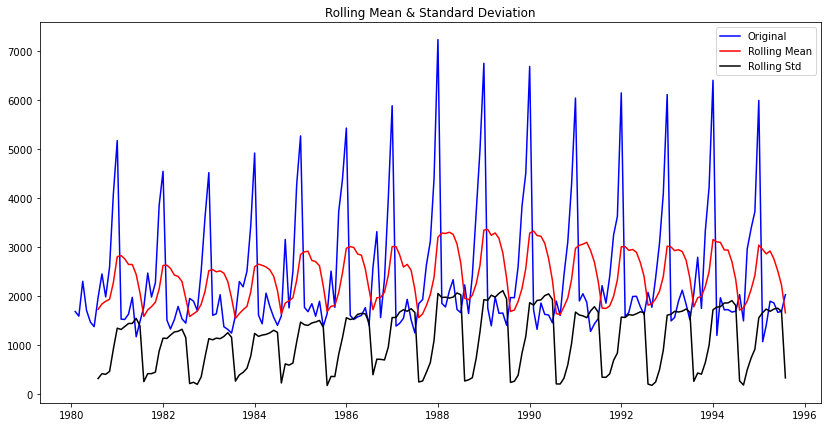

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [509]:

test_stationarity(df1['Sparkling'])

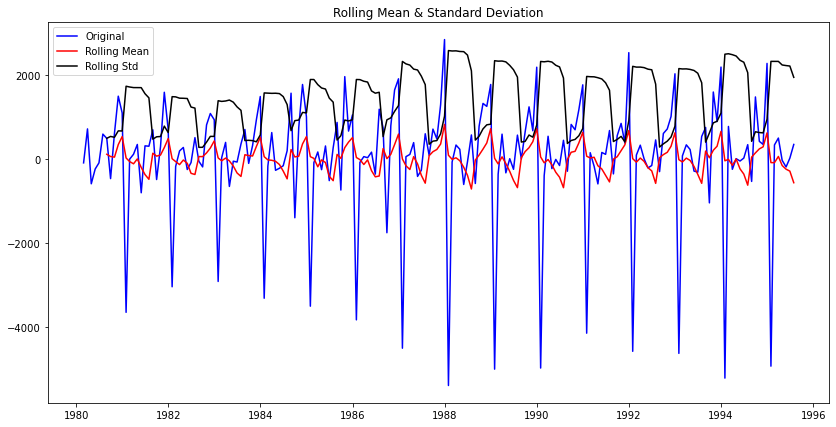

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [510]:

test_stationarity(df1['Sparkling'].diff().dropna())

In [511]:
#Building the model
full_model_autoARIMA = ARIMA(df1['Sparkling'], order=(0,1,2))

results_Arima_full_model = full_model_autoARIMA.fit()

print(results_Arima_full_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1585.653
Date:                Sun, 23 Aug 2020   AIC                           3177.307
Time:                        23:03:38   BIC                           3186.984
Sample:                    01-31-1980   HQIC                          3181.228
                         - 07-31-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6245      0.112     -5.588      0.000      -0.844      -0.405
ma.L2         -0.3755      0.056     -6.700      0.000      -0.485      -0.266
sigma2      1.448e+06   7.42e-08   1.95e+13      0.0

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [512]:
test

,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432
1991-06-30,1540
1991-07-31,2214
1991-08-31,1857
1991-09-30,2408


In [513]:


pred_dynamic = results_Arima_full_model.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)

In [514]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [515]:

pred95 = results_Arima_full_model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [516]:

forecast_fullmodel_autoarima = pred95.predicted_mean

In [517]:
pred_ci_95

,lower Sparkling,upper Sparkling
1995-08-31,-40.502591,4688.668718
1995-09-30,-138.681464,4921.691077
1995-10-31,-138.681464,4921.691078
1995-11-30,-138.681465,4921.691078
1995-12-31,-138.681465,4921.691079
1996-01-31,-138.681465,4921.691079
1996-02-29,-138.681466,4921.691079
1996-03-31,-138.681466,4921.691080
1996-04-30,-138.681467,4921.691080
1996-05-31,-138.681467,4921.691081


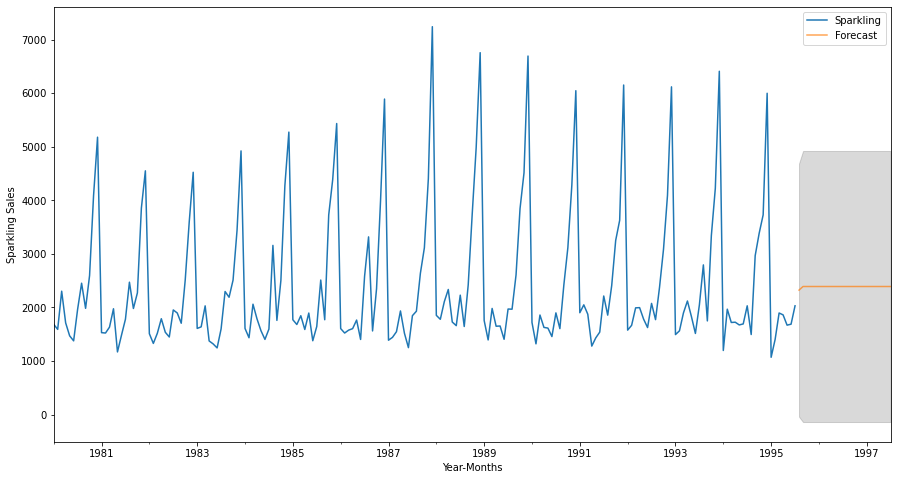

In [518]:

# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

### For a ARIMA model, we can see the predictions with 95% confidence interval bands. The seasonality was unable to be captured. Let us try out a SARIMA model.

In [519]:

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [520]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [521]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.26146168447
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640232478
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389326
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735792172
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158603798
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920776
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649566423
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.7089572863156
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.179588183797
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0903193753004
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1319668028782
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954178073
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.224508418928
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.36837422968

In [522]:

SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934565
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340402


In [523]:

import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 23 Aug 2020   AIC                           1555.585
Time:                                    23:04:54   BIC                           1574.096
Sample:                                01-31-1980   HQIC                          1563.084
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6283      0.253     -2.483      0.013      -1.124      -0.132
ma.L1         -0.1030      0.223   

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [524]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31    1326.800382
1991-02-28    1317.008560
1991-03-31    1621.845395
1991-04-30    1600.134859
1991-05-31    1393.357369
1991-06-30    1225.908188
1991-07-31    1781.184512
1991-08-31    1788.738808
1991-09-30    2193.331152
1991-10-31    3185.103683
1991-11-30    4490.991014
1991-12-31    6525.191910
1992-01-31    1307.949887
1992-02-29    1174.639446
1992-03-31    1573.183917
1992-04-30    1505.955006
1992-05-31    1308.095016
1992-06-30    1097.501271
1992-07-31    1718.228222
1992-08-31    1785.693646
1992-09-30    2127.575733
1992-10-31    3225.656766
1992-11-30    4587.525120
1992-12-31    6765.644352
1993-01-31    1252.732418
1993-02-28    1076.826728
1993-03-31    1515.924167
1993-04-30    1431.240829
1993-05-31    1233.828722
1993-06-30    1008.281432
1993-07-31    1659.800683
1993-08-31    1727.960763
1993-09-30    2086.241076
1993-10-31    3231.535929
1993-11-30    4653.627778
1993-12-31    6926.816927
1994-01-31    1172.608621
1994-02-28     988.857514
1994-03-31  

In [525]:

RMSE_autoSARIMA = mean_squared_error(test['Sparkling'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['Sparkling'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 527.5713423575794 
MAPE for the autofit SARIMA model: 18.85


In [526]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(0, 1, 2)(2, 0, 2, 12)'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.980204,43.20
"SARIMA(0, 1, 2)(2, 0, 2, 12)",527.571342,18.85


In [527]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, [1], 12)   Log Likelihood               -1195.530
Date:                              Sun, 23 Aug 2020   AIC                           2403.060
Time:                                      23:04:56   BIC                           2421.585
Sample:                                  01-31-1980   HQIC                          2410.581
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9166      0.100     -9.123      0.000      -1.114      -0.720
ma.L2         -0.12

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [528]:

pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)

In [529]:

pred_dynamic_ci = pred_dynamic.conf_int()

In [530]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [531]:

forecast_fullmodel_autosarima = pred95.predicted_mean

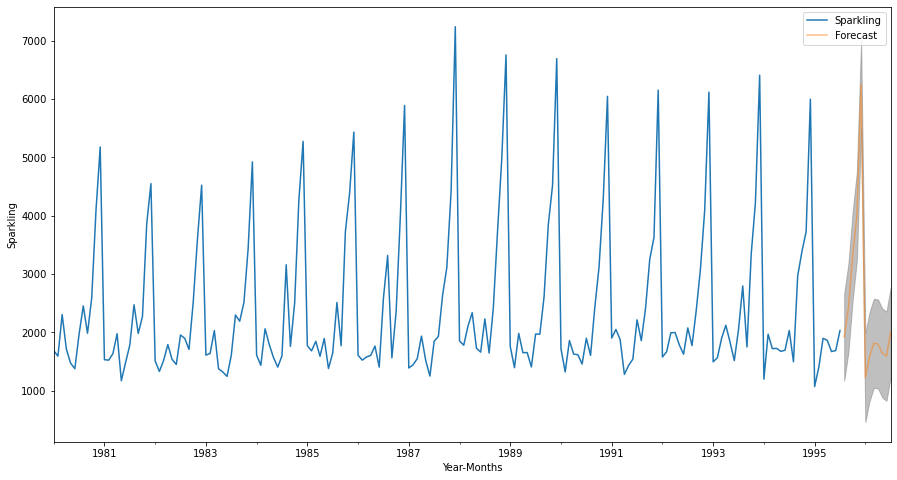

In [532]:

# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='gray', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

# Building the iterations of the models based on the ACF and PACF plots.


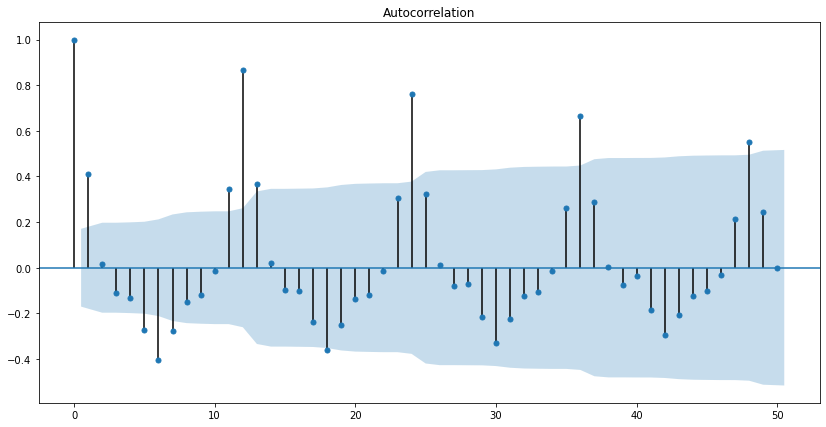

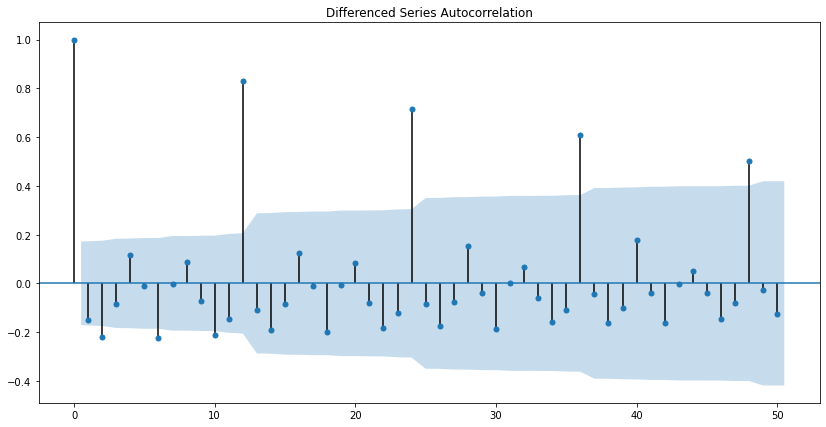

In [533]:
plot_acf(train['Sparkling'],lags=50)
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Autocorrelation')
plt.show()

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


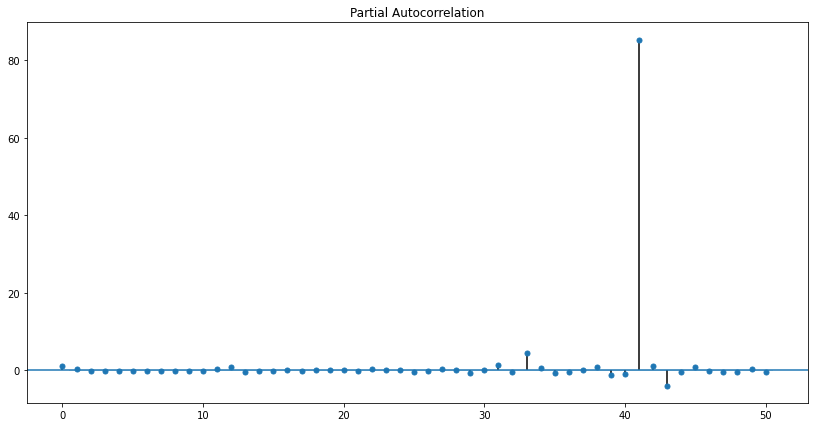

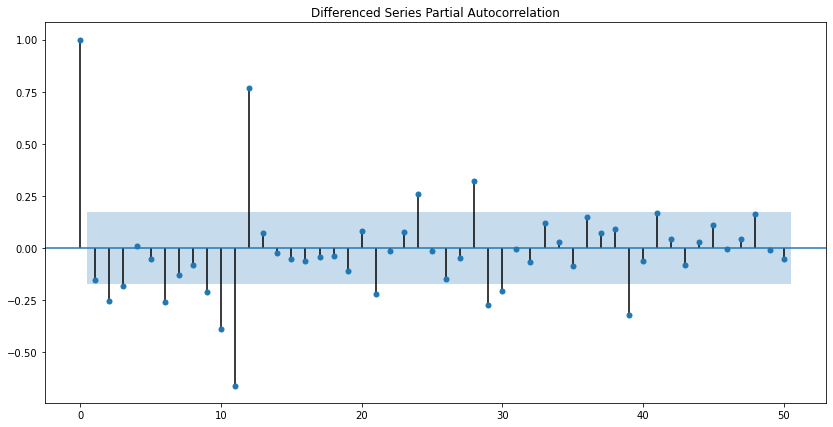

In [534]:
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Series Partial Autocorrelation')
plt.show()

In [535]:
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'],freq='M',
                                order=(0,1,1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=100000)
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -878.328
Date:                             Sun, 23 Aug 2020   AIC                           1760.657
Time:                                     23:04:57   BIC                           1766.181
Sample:                                 01-31-1980   HQIC                          1762.899
                                      - 12-31-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9200      0.038    -24.315      0.000      -0.994      -0.846
sigma2      1.919e+05   1.8

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


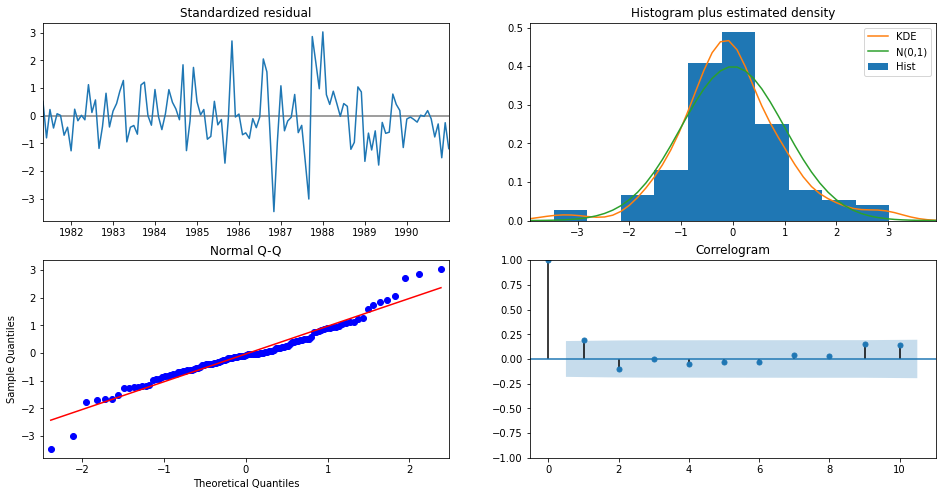

In [536]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [537]:
pred = results.get_forecast(steps=len(test))
pred.predicted_mean

1991-01-31    1551.685143
1991-02-28    1152.685143
1991-03-31    1690.685143
1991-04-30    1459.685143
1991-05-31    1446.685143
1991-06-30    1288.685143
1991-07-31    1730.685143
1991-08-31    1436.685143
1991-09-30    2255.685143
1991-10-31    2947.685143
1991-11-30    4117.685143
1991-12-31    5878.685143
1992-01-31    1383.370286
1992-02-29     984.370286
1992-03-31    1522.370286
1992-04-30    1291.370286
1992-05-31    1278.370286
1992-06-30    1120.370286
1992-07-31    1562.370286
1992-08-31    1268.370286
1992-09-30    2087.370286
1992-10-31    2779.370286
1992-11-30    3949.370286
1992-12-31    5710.370286
1993-01-31    1215.055428
1993-02-28     816.055428
1993-03-31    1354.055428
1993-04-30    1123.055428
1993-05-31    1110.055428
1993-06-30     952.055428
1993-07-31    1394.055428
1993-08-31    1100.055428
1993-09-30    1919.055428
1993-10-31    2611.055428
1993-11-30    3781.055428
1993-12-31    5542.055428
1994-01-31    1046.740571
1994-02-28     647.740571
1994-03-31  

In [538]:
rmse = mean_squared_error(test['Sparkling'],pred.predicted_mean,squared=False)
print(rmse)

681.7197811884774


In [539]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0, 1, 1)(0, 1, 0, 12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.980204,43.20
"SARIMA(0, 1, 2)(2, 0, 2, 12)",527.571342,18.85
"SARIMA(0, 1, 1)(0, 1, 0, 12)",681.719781,NaN


In [540]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1991-01-31'), dynamic=True, full_results=True)

In [541]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [542]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [543]:
pred_ci_95

,lower Sparkling,upper Sparkling
1995-08-31,1168.436802,2665.481670
1995-09-30,1662.153697,3178.755451
1995-10-31,2552.076188,4070.068641
1995-11-30,3235.956495,4755.338392
1995-12-31,5490.784642,7011.554789
1996-01-31,461.610872,1983.767906
1996-02-29,823.423884,2346.966540
1996-03-31,1050.450955,2575.377977
1996-04-30,1036.870093,2563.180225
1996-05-31,881.937505,2409.629494


In [544]:
forecast_fullmodel_autosarima = pred95.predicted_mean

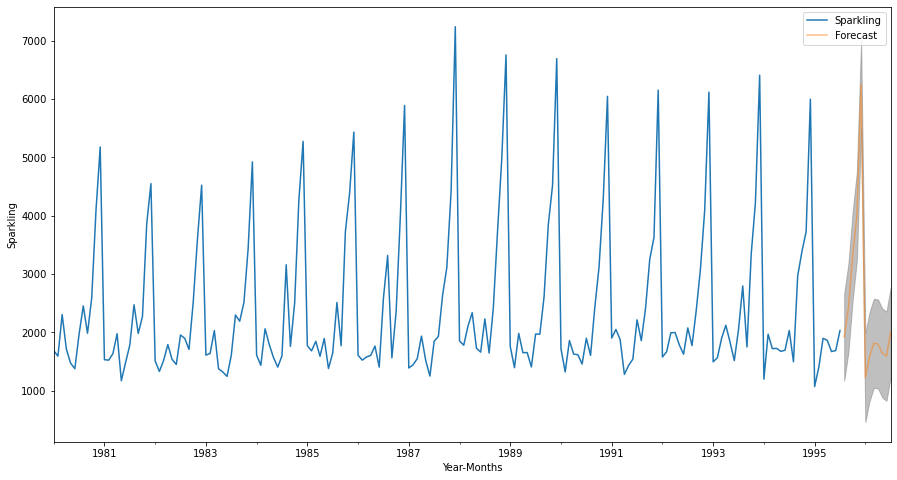

In [545]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Sparkling'], pred_ci_95['upper Sparkling'], color='gray', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()